# 教師なし学習

## クラスタリング

### k-means 法

In [1]:
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import sklearn

%matplotlib inline

データは make_blobs を用いて発生させます．

Text(0, 0.5, 'feature2')

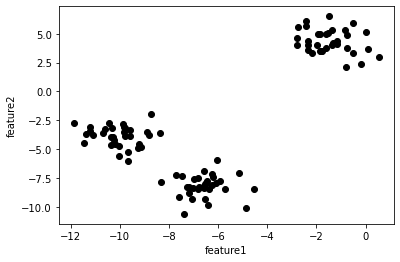

In [2]:
from sklearn.cluster import KMeans

from sklearn.datasets import make_blobs

# サンプルデータ生成
# 注意：make_blobsの2つの値のうち一方は使用しない
X, _ = make_blobs(random_state=1)

# データを表示
plt.scatter(X[:,0],X[:,1],color='black')
plt.xlabel('feature1')
plt.ylabel('feature2')
#save_fig('kmeans_data')

In [3]:
kmeans = KMeans(init='random',n_clusters=2)

# クラスターの重心を計算
kmeans.fit(X)

# クラスター番号を予測
y_pred = kmeans.predict(X)

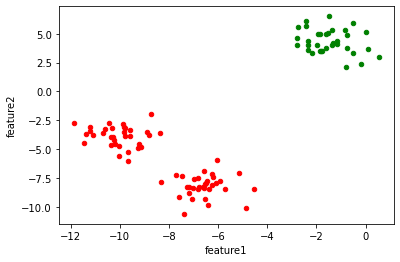

In [5]:
result = pd.concat([pd.DataFrame(X[:,0]), pd.DataFrame(X[:,1]), pd.DataFrame(y_pred)], axis=1)
result.columns = ['feature1','feature2','cluster']
# 結果のグラフ化
colors = ['red', 'green']

ax = None
for i, data in result.groupby('cluster'):
     ax =data.plot.scatter(x='feature1',y='feature2', color=colors[i],ax=ax)

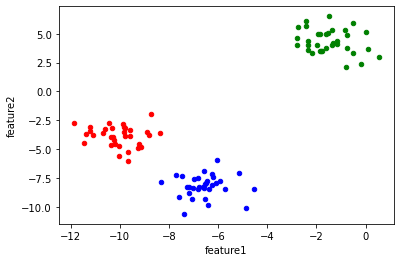

In [6]:
kmeans = KMeans(init='random',n_clusters=3)

# クラスターの重心を計算
kmeans.fit(X)

# クラスター番号を予測
y_pred = kmeans.predict(X)

result = pd.concat([pd.DataFrame(X[:,0]), pd.DataFrame(X[:,1]), pd.DataFrame(y_pred)], axis=1)
result.columns = ['feature1','feature2','cluster']
# 結果のグラフ化
colors = ['blue', 'red', 'green']

ax = None
for i, data in result.groupby('cluster'):
     ax =data.plot.scatter(x='feature1', y='feature2', color=colors[i],ax=ax)
#save_fig('kmeans_result')

クラスタ数のように学習のためのパラメータをハイパーパラメータとよびます．

## 主成分分析

scikit-learnの乳がんのデータを使用します．

In [7]:
from sklearn.datasets import load_breast_cancer

# データ取得
cancer = load_breast_cancer()
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

データを悪性 malignant と良性 benign に分けます． 

In [10]:
malignant = cancer.data[cancer.target==0]
benign = cancer.data[cancer.target==1]

特徴量のヒストグラムを表示します．

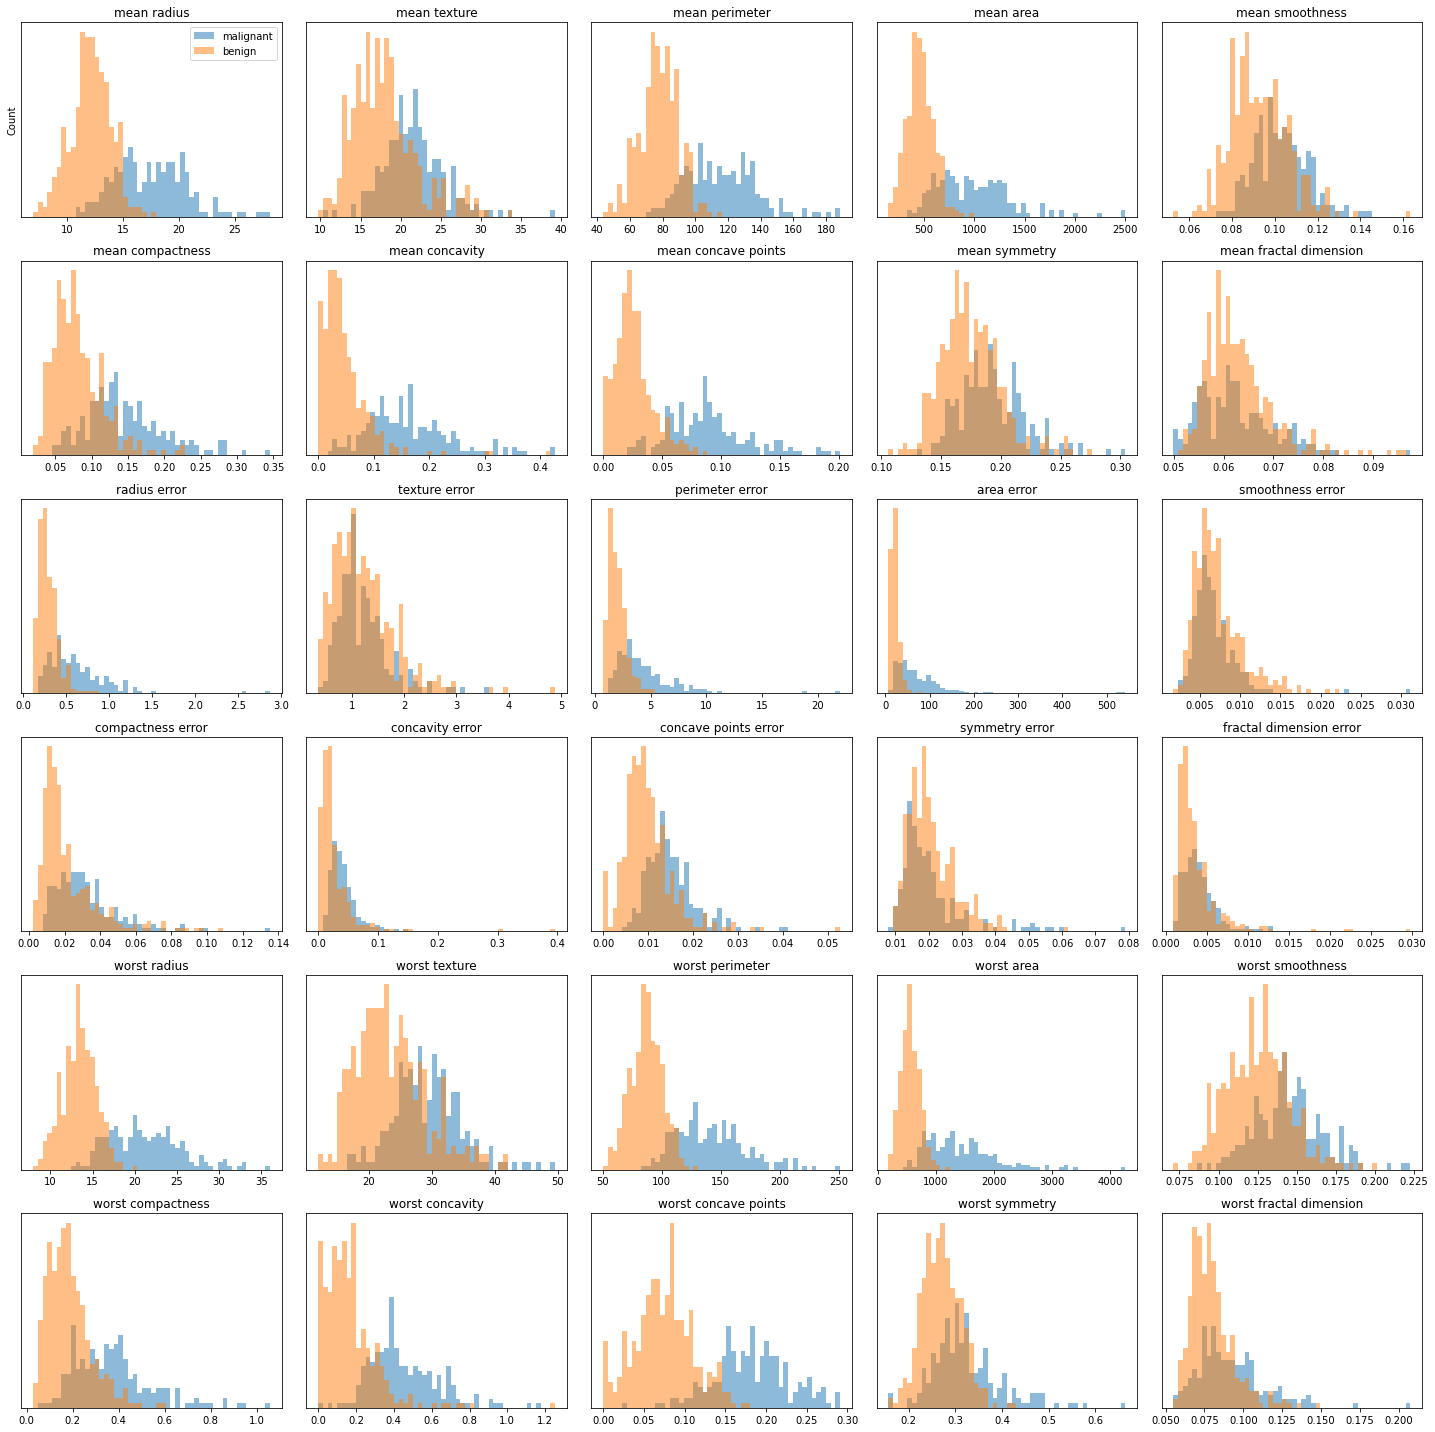

In [11]:
fig, axes = plt.subplots(6,5,figsize=(20,20))
ax = axes.ravel()
for i in range(30):
    _,bins = np.histogram(cancer.data[:,i], bins=50)
    ax[i].hist(malignant[:,i], bins, alpha=.5)
    ax[i].hist(benign[:,i], bins, alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
    
# ラベルの設定
ax[0].set_ylabel('Count')
ax[0].legend(['malignant','benign'],loc='best')
fig.tight_layout()

特徴量を正規化します．

In [12]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_std = sc.fit_transform(cancer.data)

主成分分析します．第二主成分まで求めます．

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_std)
X_pca = pca.transform(X_std)

第一主成分と第二主成分を図示するため結果を加工します．

In [14]:
# 列ラベル
X_pca = pd.DataFrame(X_pca, columns=['pc1','pc2'])

# 目的変数（cancer.target）を追加
X_pca = pd.concat([X_pca, pd.DataFrame(cancer.target, columns=['target'])], axis=1)

# 悪性と良性を分ける
pca_malignant = X_pca[X_pca['target']==0]
pca_benign = X_pca[X_pca['target']==1]

可視化します．

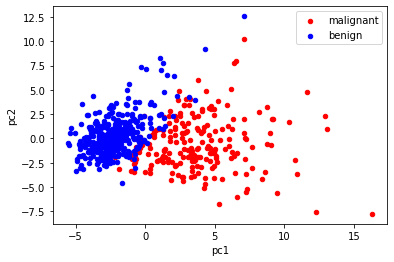

In [15]:
ax = pca_malignant.plot.scatter(x='pc1', y='pc2', color='red', label='malignant');
pca_benign.plot.scatter(x='pc1', y='pc2', color='blue', label='benign', ax=ax);
#save_fig('b_cancer')

Copyright. All rights reserved. Shuichi OHNO, 2020.